In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


# Load Data

In [16]:
df = pd.read_csv('df_copy.csv')
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Month_encoded,VisitorType_isNew_Visitor,VisitorType_isReturning_Visitor,Session_Duration,Page_Count,Avg_Duration_Per_Page
1191,2.0,33.000000,0,0.000000,25,1720.000000,0.000000,0.007692,60.290184,0.0,...,1,Returning_Visitor,0,1,2,0,1,1753.000000,27.0,64.925926
8676,11.0,504.283333,1,0.000000,58,2451.058466,0.012366,0.022770,0.000000,0.0,...,1,Returning_Visitor,0,0,11,0,1,2955.341799,70.0,42.219169
9398,1.0,12.000000,2,11.000000,18,974.166667,0.005455,0.032251,0.000000,0.0,...,2,New_Visitor,0,0,10,1,0,997.166667,21.0,47.484127
10188,0.0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,...,2,Returning_Visitor,0,0,11,0,1,0.000000,1.0,0.000000
5258,0.0,0.000000,0,0.000000,36,788.500000,0.000000,0.025000,0.000000,0.0,...,3,Returning_Visitor,0,0,10,0,1,788.500000,36.0,21.902778
3299,0.0,0.000000,0,0.000000,41,3272.000000,0.045238,0.078571,0.000000,0.8,...,6,Returning_Visitor,0,0,4,0,1,3272.000000,41.0,79.804878
2198,2.0,100.000000,0,0.000000,22,639.500000,0.000000,0.008696,101.372174,0.0,...,4,Returning_Visitor,1,1,4,0,1,739.500000,24.0,30.812500
8577,0.0,0.000000,0,0.000000,18,559.000000,0.047059,0.098039,0.000000,0.0,...,1,Returning_Visitor,1,0,10,0,1,559.000000,18.0,31.055556
8156,0.0,0.000000,2,485.833333,89,3747.814286,0.013636,0.030211,0.000000,0.0,...,2,Returning_Visitor,1,1,10,0,1,4233.647619,91.0,46.523600
6625,10.0,85.040000,0,0.000000,114,2139.156647,0.000000,0.009415,0.000000,0.0,...,2,Returning_Visitor,0,0,10,0,1,2224.196647,124.0,17.937070


# Modelling

## Data Split

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Assign features dan target variable
X = df[['Month_encoded', 'VisitorType_isNew_Visitor', 'SpecialDay', 'PageValues', 'ExitRates', 'Page_Count']]
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
Revenue
0    6173
1    3086
Name: count, dtype: int64


## <b>Logistic Regression<b>

### Function

In [162]:
# Scaling data with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [164]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


In [166]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def draw_learning_curve_recall(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression( C=c, penalty= 'l1', solver= 'liblinear', random_state= 42)
        model.fit(X_train_scaled, y_train)

        # eval on train
        y_pred_train = model.predict(X_train_scaled)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred_test = model.predict(X_test_scaled)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Fit Data to Model

In [169]:
from sklearn.linear_model import LogisticRegression 

# Train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Evaluate model
eval_classification(logreg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.82
Precision (Test Set): 0.58
Precision (Train Set): 0.83
Recall (Test Set): 0.81
Recall (Train Set): 0.59
F1-Score (Test Set): 0.68
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.89
recall (crossval train): 0.37605258041395684
recall (crossval test): 0.35984894538086026
True Positives (TP): 593
False Positives (FP): 219
True Negatives (TN): 8601
False Negatives (FN): 1055


In [ ]:
# Hyper parameter tuning 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [float(x) for x in np.linspace(0.0001, 0.01)],
    'solver': ['liblinear', 'saga', 'sag'],
    'random_state': [42]
}

# Create a scorer for recall
recall_scorer = make_scorer(recall_score)

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator found by grid search
best_clf = grid_search.best_estimator_

# Predict probabilities on the test set
y_prob = best_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
eval_classification(grid_search)
show_best_hyperparameter(grid_search)

In [ ]:
# Learning curve to find best C value
param_values = [float(x) for x in np.linspace(0.0002, 0.001)]
draw_learning_curve_recall(param_values)

### Model with best parameter

In [39]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with best estimator with modified C based on learning curve
best_model = LogisticRegression(
    C=0.0002,
    class_weight='balanced',
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l1',
    random_state=42,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

best_model.fit(X_train_scaled, y_train)

# Evaluate model
eval_classification(best_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.60
Precision (Train Set): 0.77
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.87
recall (crossval train): 0.8304015894691915
recall (crossval test): 0.8087169568020631
True Positives (TP): 1333
False Positives (FP): 2112
True Negatives (TN): 6708
False Negatives (FN): 315


Setelah tuning, recall pada data test meningkat signifikan dari 0.81 menjadi 0.92, menunjukkan model lebih efektif dalam mengidentifikasi kasus positif dan meminimalkan false negatives. Namun terdapat trade off, yaitu precision dan accuracy yang menurun, mengindikasikan banyak false positives yang dapat mengakibatkan inefisiensi/biaya tambahan dalam penanganan pengguna. Recall cross-validation juga meningkat secara signifikan, menunjukkan bahwa model memiliki performa yang lebih konsisten dan dapat diandalkan. Secara keseluruhan, meskipun ada penurunan pada pengukuran lain, peningkatan recall yang besar menunjukkan bahwa model lebih mampu mendeteksi semua kasus positif untuk tujuan peningkatan revenue.

# <b>Random Forest Classifier<b>

### Function

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate


X_train = X_train
y_train = y_train

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


### Fit Data to Model

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier

# Fit Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

# Prediksi menggunakan cross-validation pada training set
y_pred_cv_train = cross_val_predict(rf, X_train, y_train, cv=5)

# Hitung confusion matrix pada training set
conf_matrix_train = confusion_matrix(y_train, y_pred_cv_train)

# Extract TP, FP, TN, FN dari confusion matrix training set
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()

print(f"Training Set - True Positives (TP): {TP_train}")
print(f"Training Set - False Positives (FP): {FP_train}")
print(f"Training Set - True Negatives (TN): {TN_train}")
print(f"Training Set - False Negatives (FN): {FN_train}")




Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.62
Recall (Train Set): 0.99
Recall (Test Set): 0.70
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 0.9816424131492452
recall (crossval test): 0.5618826563507413
Training Set - True Positives (TP): 2626
Training Set - False Positives (FP): 537
Training Set - True Negatives (TN): 5636
Training Set - False Negatives (FN): 460


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
from scipy.stats import randint

# Define the classifier
rf = RandomForestClassifier()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 301),        # Randomly sample number of trees between 100 and 300
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),      # Randomly sample min samples split between 2 and 10
    'min_samples_leaf': randint(1, 5),        # Randomly sample min samples leaf between 1 and 4
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define scoring metric (e.g., recall)
scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, 
                                    cv=5, scoring=scorer, verbose=1, n_jobs=-1, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the model with the best parameters
best_rf = random_search.best_estimator_

# Evaluate classification (if needed)
eval_classification(best_rf)

# Prediksi menggunakan cross-validation pada training set
y_pred_cv_train = cross_val_predict(best_rf, X_train, y_train, cv=5)

# Hitung confusion matrix pada training set
conf_matrix_train = confusion_matrix(y_train, y_pred_cv_train)


# Extract TP, FP, TN, FN dari confusion matrix training set
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()

print(f"Training Set - True Positives (TP): {TP_train}")
print(f"Training Set - False Positives (FP): {FP_train}")
print(f"Training Set - True Negatives (TN): {TN_train}")
print(f"Training Set - False Negatives (FN): {FN_train}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 229}
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.62
Recall (Train Set): 0.99
Recall (Test Set): 0.71
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9698092890070533
recall (crossval test): 0.5618881827392466
Training Set - True Positives (TP): 2623
Training Set - False Positives (FP): 552
Training Set - True Negatives (TN): 5621
Training Set - False Negatives (FN): 463


param value: 1; train: 0.6937783538561244; test: 0.6538461538461539
param value: 2; train: 0.8046014257939079; test: 0.7834008097165992
param value: 3; train: 0.8165910563836681; test: 0.7955465587044535
param value: 4; train: 0.8159429682436812; test: 0.7935222672064778
param value: 5; train: 0.8104342190537913; test: 0.771255060728745
param value: 6; train: 0.8104342190537913; test: 0.7672064777327935
param value: 7; train: 0.8104342190537913; test: 0.7651821862348178
param value: 8; train: 0.813350615683733; test: 0.757085020242915
param value: 9; train: 0.820803629293584; test: 0.7408906882591093
param value: 10; train: 0.8431626701231367; test: 0.7388663967611336
param value: 11; train: 0.8564484769928711; test: 0.7307692307692307
param value: 12; train: 0.8804277381723914; test: 0.7327935222672065
param value: 13; train: 0.8946856772521062; test: 0.728744939271255
param value: 14; train: 0.9186649384316267; test: 0.7226720647773279
param value: 15; train: 0.9348671419313026; test

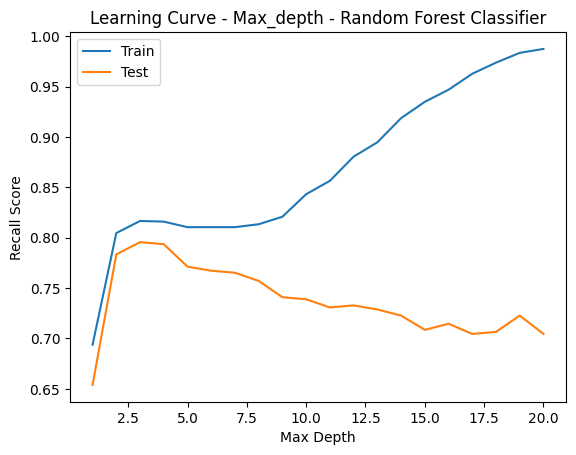

In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Definisikan parameter values untuk max_depth
param_values = [int(x) for x in np.linspace(1, 20, 20)]

train_scores = []
test_scores = []

for depth in param_values:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(depth) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Recall Score')
plt.title('Learning Curve - Max_depth - Random Forest Classifier')
plt.legend()
plt.show()

Berdasarkan hasil algoritma Random Forest Classifier menunjukkan data overfitting sehingga dilakukan Hyperparameter Tuning menggunakan RandomizedSeacrhCv dan hasil menunjukkan data masih overfitting. <br>
Oleh karena itu dicari nilai max_depth yang optimal untuk mencegah overfitting, dan didapati nilai max_depth yang optimal bernilai 2. <br>
Namun dari grafik learning curvet tidak terdapat perpotongan antara garis data train dengan data test serta di coba tuning kembali dan hasilnya underfit. <br> 
Dapat disimpulkan bahwa data tidak cocok menggunakan algoritma Random Forest Classifier.

# <b>Decission Tree <b>

### Function

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

X_train = X_train
y_train = y_train

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Fit Data to Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 1.00
Precision (Test Set): 0.54
Precision (Train Set): 1.00
Recall (Test Set): 0.59
Recall (Train Set): 0.99
F1-Score (Test Set): 0.56
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.75
roc_auc (train-proba): 1.00
recall (crossval train): 0.9822493934223863
recall (crossval test): 0.5472672008842222
True Positives (TP): 905
False Positives (FP): 793
True Negatives (TN): 8027
False Negatives (FN): 743


In [52]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=42)
model_dt_random =  RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model_dt_random.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_random.predict(X_test)#Check performa dari model
eval_classification(model_dt_random)
show_best_hyperparameter(model_dt_random)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.86
Precision (Test Set): 0.62
Precision (Train Set): 0.79
Recall (Test Set): 0.78
Recall (Train Set): 0.80
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
recall (crossval train): 0.6252888505915066
recall (crossval test): 0.6025274016763378
True Positives (TP): 914
False Positives (FP): 528
True Negatives (TN): 8292
False Negatives (FN): 734
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 79, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


Dari hasil implementasi algoritma Decision Tree pada data, didapatkan bahwa performa model masih overfitting, sehingga dilakukan hyperparameter tuning menggunakan randomized search.
Setelah dilakukan tuning, nilai recall menunjukkan adanya peningkatan, namun cross validation masih bisa dioptimalkan lagi. Oleh karena itu, dilakukan modelling dengan menggunakan parameter yang lebih baik. 


param value: 1; train: 0.8243681140635126; test: 0.8076923076923077
param value: 2; train: 0.8243681140635126; test: 0.8076923076923077
param value: 3; train: 0.7705767984445885; test: 0.7489878542510121
param value: 4; train: 0.8033052495139339; test: 0.7834008097165992
param value: 5; train: 0.7482177576150356; test: 0.6983805668016194
param value: 6; train: 0.7747893713545042; test: 0.7267206477732794
param value: 7; train: 0.7926117952041478; test: 0.7186234817813765
param value: 8; train: 0.7916396629941672; test: 0.6963562753036437
param value: 9; train: 0.829552819183409; test: 0.6923076923076923
param value: 10; train: 0.8373298768632534; test: 0.6518218623481782
param value: 11; train: 0.8716785482825664; test: 0.6781376518218624
param value: 12; train: 0.8749189889825016; test: 0.6437246963562753
param value: 13; train: 0.8924173687621516; test: 0.6437246963562753
param value: 14; train: 0.899546338302009; test: 0.6194331983805668
param value: 15; train: 0.922553467271549; te

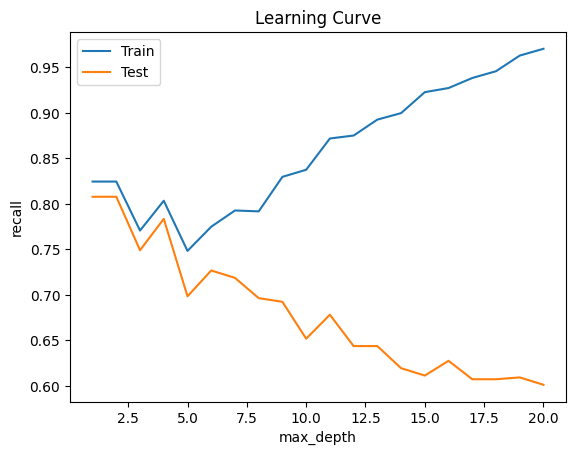

In [53]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 20, 20)]
draw_learning_curve(param_values)

Max_depth optimal range = 1--7

param value: 1; train: 0.9938431626701232; test: 0.5910931174089069
param value: 3; train: 0.9186649384316267; test: 0.6295546558704453
param value: 5; train: 0.881399870382372; test: 0.6336032388663968
param value: 7; train: 0.8635774465327285; test: 0.645748987854251
param value: 9; train: 0.8451069345430978; test: 0.6700404858299596
param value: 11; train: 0.8386260531432275; test: 0.7004048582995951
param value: 13; train: 0.8441348023331173; test: 0.6963562753036437
param value: 15; train: 0.8318211276733636; test: 0.6781376518218624
param value: 17; train: 0.8340894361633182; test: 0.7004048582995951
param value: 19; train: 0.8178872326636423; test: 0.6963562753036437
param value: 21; train: 0.820803629293584; test: 0.6963562753036437
param value: 23; train: 0.8101101749837978; test: 0.6963562753036437
param value: 25; train: 0.8091380427738173; test: 0.6983805668016194
param value: 27; train: 0.8240440699935191; test: 0.7388663967611336
param value: 29; train: 0.8149708360337006

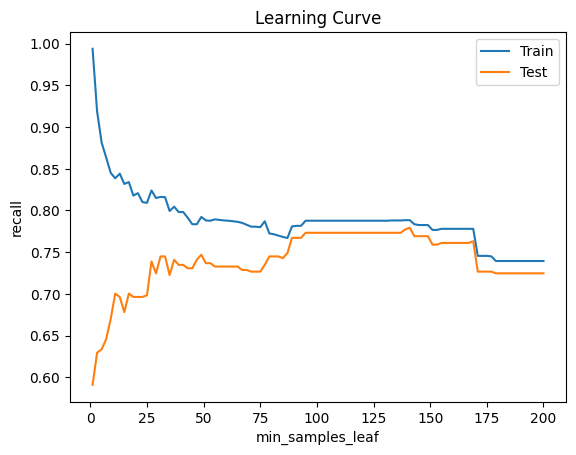

In [54]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 200, 100)]
draw_learning_curve(param_values)

param value: 2; train: 0.9938431626701232; test: 0.6174089068825911
param value: 5; train: 0.9520414776409591; test: 0.5951417004048583
param value: 8; train: 0.9232015554115359; test: 0.5951417004048583
param value: 11; train: 0.9118600129617628; test: 0.6255060728744939
param value: 14; train: 0.8969539857420609; test: 0.631578947368421
param value: 17; train: 0.8898250162022034; test: 0.645748987854251
param value: 20; train: 0.8872326636422554; test: 0.6720647773279352
param value: 23; train: 0.881399870382372; test: 0.6781376518218624
param value: 26; train: 0.8826960466623461; test: 0.6781376518218624
param value: 29; train: 0.8846403110823072; test: 0.6882591093117408
param value: 32; train: 0.8791315618924174; test: 0.6882591093117408
param value: 35; train: 0.8758911211924821; test: 0.6963562753036437
param value: 38; train: 0.8668178872326636; test: 0.6862348178137652
param value: 41; train: 0.8587167854828257; test: 0.6882591093117408
param value: 44; train: 0.85904082955281

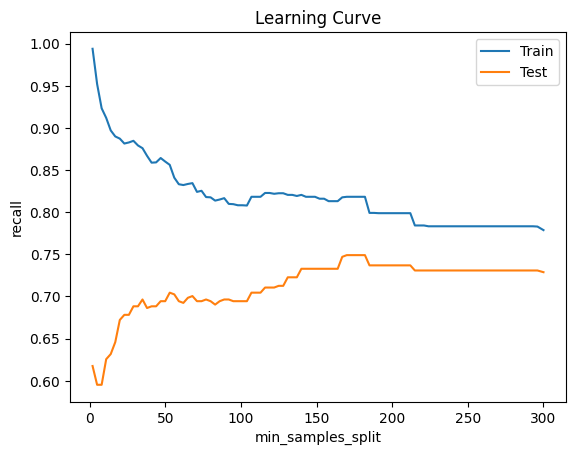

In [55]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_split=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 300, 100)]
draw_learning_curve(param_values)

min_samples_leaf = 90--170

min_samples_split = 185--215

Dari learning curve dengan sumbu Y recall, dan sumbu X max depth, min_samples_leaf, dan min_samples_split, didapatkan parameter terbaik sebagai berikut:
Max_depth optimal range = 1--7
min_samples_leaf = 90--170
min_samples_split = 185--215


### Model with best parameter

In [57]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 7)] # Maximum number of levels in tree
min_samples_split = [185, 200, 215] # Minimum number of samples required to split a node
min_samples_leaf = [90, 110, 130, 150, 170] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_grid = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model_dt_grid.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_grid.predict(X_test)#Check performa dari model
eval_classification(model_dt_grid)
show_best_hyperparameter(model_dt_grid)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.60
Precision (Train Set): 0.77
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.85
recall (crossval train): 0.8076377584066654
recall (crossval test): 0.8069116698903933
True Positives (TP): 1330
False Positives (FP): 1034
True Negatives (TN): 7786
False Negatives (FN): 318
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 90, 'min_samples_split': 185, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Correcting the hyperparameter assignment
model_dt_best = DecisionTreeClassifier(
    random_state=42,
    max_depth=1,              
    min_samples_split=185,    
    min_samples_leaf=90,      
    max_features='auto',      
    criterion='gini',
    splitter='best'
)

# Fitting the model
model_dt_best.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt_best.predict(X_test)

# Evaluate the model
eval_classification(model_dt_best)



Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.60
Precision (Train Set): 0.77
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.85
recall (crossval train): 0.7935347857449371
recall (crossval test): 0.7826029289859078
True Positives (TP): 1290
False Positives (FP): 987
True Negatives (TN): 7833
False Negatives (FN): 358


 Setelah penyesuaian parameter, recall pada data test meningkat. Hasil cross-validation menunjukkan peningkatan recall yang signifikan, mengindikasikan model lebih konsisten pada data train dan test. Meskipun ada penurunan dalam beberapa metrik lain, peningkatan recall ini menunjukkan bahwa model lebih efektif dalam meminimalkan false negatives. 

# <b>AdaBoost <b>

### Function

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

X_train = X_train
y_train = y_train

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Fit Data to Model

In [63]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.87
Precision (Test Set): 0.66
Precision (Train Set): 0.83
Recall (Test Set): 0.71
Recall (Train Set): 0.76
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.93
recall (crossval train): 0.5922287887660331
recall (crossval test): 0.518948144054527
True Positives (TP): 855
False Positives (FP): 558
True Negatives (TN): 8262
False Negatives (FN): 793


### Model with best parameter

In [64]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)
show_best_hyperparameter(ab_tuned)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.86
Precision (Test Set): 0.60
Precision (Train Set): 0.77
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
recall (crossval train): 0.5816085897602565
recall (crossval test): 0.5238279451045409
True Positives (TP): 863
False Positives (FP): 530
True Negatives (TN): 8290
False Negatives (FN): 785
{'algorithm': 'SAMME', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.02836180904522613, 'n_estimators': 311, 'random_state': 42}


param value: 0.001; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.0014974874371859296; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.0019949748743718593; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.002492462311557789; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.0029899497487437185; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.003487437185929648; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.003984924623115577; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.0044824120603015076; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.004979899497487437; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.005477386934673366; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.005974874371859296; train: 0.8243681140635126; test: 0.8076923076923077
param value: 0.006472361809045226; train: 0.8243681140

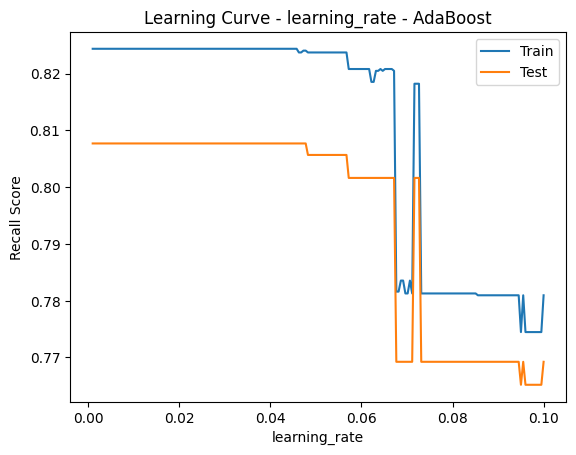

In [65]:
# Definisikan parameter values untuk learning_rate
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)]

train_scores = []
test_scores = []

for i in param_values:
    model = AdaBoostClassifier(learning_rate=i)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))
    
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('learning_rate')
plt.ylabel('Recall Score')
plt.title('Learning Curve - learning_rate - AdaBoost')
plt.legend()
plt.show()

Dari hasil penggunaan algoritma AdaBoost pada data, didapatkan bahwa performa model masih overfitting, sehingga dilakukan modelling lagi dengan best parameters.
Setelah dilakukan modelling dengan best parameters, nilai recall menunjukkan adanya peningkatan, namun cross validation tidak berubah signifikan.


# <b>XGBoost <b>

### Fit Data to Model

In [67]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.95
Precision (Test Set): 0.65
Precision (Train Set): 0.94
Recall (Test Set): 0.70
Recall (Train Set): 0.89
F1-Score (Test Set): 0.67
F1-Score (Train Set): 0.92
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.99
recall (crossval train): 0.8062717076554755
recall (crossval test): 0.550336188634061
True Positives (TP): 907
False Positives (FP): 477
True Negatives (TN): 8343
False Negatives (FN): 741


### Model with best parameter

In [69]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)
show_best_hyperparameter(xg_tuned)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.97
Precision (Test Set): 0.62
Precision (Train Set): 0.96
Recall (Test Set): 0.67
Recall (Train Set): 0.94
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.95
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.99
recall (crossval train): 0.6856733788070006
recall (crossval test): 0.5806871143041356
True Positives (TP): 957
False Positives (FP): 444
True Negatives (TN): 8376
False Negatives (FN): 691
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.5, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 110, 'max_leaves': None, 'min_chil

param value: 10; train: 0.9679196370706417; test: 0.6538461538461539
param value: 20; train: 0.9922229423201555; test: 0.6518218623481782
param value: 30; train: 0.9922229423201555; test: 0.645748987854251
param value: 40; train: 0.992546986390149; test: 0.645748987854251
param value: 50; train: 0.9928710304601426; test: 0.6376518218623481
param value: 60; train: 0.992546986390149; test: 0.645748987854251
param value: 70; train: 0.992546986390149; test: 0.645748987854251
param value: 80; train: 0.992546986390149; test: 0.645748987854251
param value: 90; train: 0.992546986390149; test: 0.645748987854251
param value: 100; train: 0.992546986390149; test: 0.645748987854251
param value: 110; train: 0.992546986390149; test: 0.645748987854251


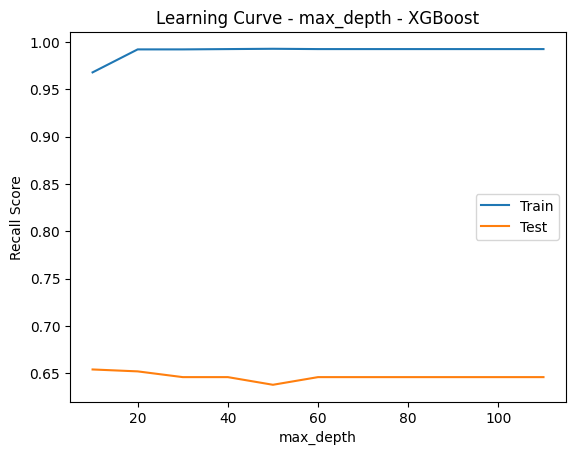

In [70]:
# Definisikan parameter values untuk max_depth
param_values = [int(x) for x in np.linspace(10, 110, num = 11)]

train_scores = []
test_scores = []

for i in param_values:
    model = XGBClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))
    
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Recall Score')
plt.title('Learning Curve - max_depth - XGBoost')
plt.legend()
plt.show()

Hasil penerapan algoritma XGBoost pada data, didapatkan bahwa performa model masih overfitting, sehingga dilakukan modelling lagi dengan best parameters.
Setelah dilakukan modelling dengan best parameters, nilai recall justru semakin overfitting. Selain itu, performa cross validation juga masih belum ideal (overfit dan hanya ada sedikit peningkatan pada crossval test).

# Kesimpulan :

Recall (cross validation) digunakan sebagai matrix evaluasi dengan fokus terhadap nilai False Negative dalam membandingkan performa antar algoritma model klasifikasi mechine learning (Supervised Learning).<br>
Kasus dalam dataset ini dimana perusahaan ingin meningkatkan revenue. Maka dari itu, recall - cross validation (tidak hanya dioptimalkan untuk dataset tertentu, tetapi memiliki generalisasi yang baik pada dataset lainnya) menjadi fokus utama untuk menghindari model gagal mengidentifikasi pelanggan yang benar-benar menghasilkan revenue. Dengan nilai false negatives rendah, diharapkan lebih banyak peluang revenue yang tidak terlewatkan oleh perusahaan.<br>

Setelah uji coba beberapa algoritma model klasifikasi yaitu Logistic Regression, Decission Tree, Random Forest, AdaBoost, dan XGBoost. <br>
Model algoritma **Logistic Regression** dengan Hyperparameter Tuning dipilih karena memiliki nilai Recall (cross validation) tertinggi dengan nilai False Negative terendah daripada algoritma lainnya. <br>
Disamping itu Logistic Regression memiliki kecepatan inferensiasi yang lebih cepat, memiliki skalabilitas dan komputasi yang lebih sederhana, serta lebih mudah untuk diinterpretasikan.  

### Feature Importance

In [40]:
# Extract the best model from GridSeacrh
gs_model = grid_search.best_estimator_

# Coefficient of gs_model
print("\nCoefficient of gs_model")
print(X.columns)
print(gs_model.coef_)

# Coefficient of best_model
print("\nCoefficient of best_model")
print(X.columns)
print(best_model.coef_)


Coefficient of gs_model
Index(['Month_encoded', 'VisitorType_isNew_Visitor', 'SpecialDay',
       'PageValues', 'ExitRates', 'Page_Count'],
      dtype='object')
[[ 0.          0.          0.          0.31514376 -0.13810246  0.        ]]

Coefficient of best_model
Index(['Month_encoded', 'VisitorType_isNew_Visitor', 'SpecialDay',
       'PageValues', 'ExitRates', 'Page_Count'],
      dtype='object')
[[0.         0.         0.         0.02854369 0.         0.        ]]


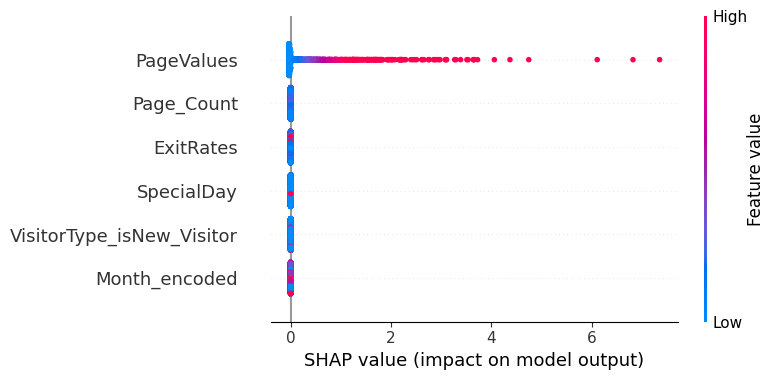

In [61]:
import shap
import numpy as np
from sklearn.linear_model import LogisticRegression
import shap

feature_names = ['Month_encoded', 'VisitorType_isNew_Visitor', 'SpecialDay',
                 'PageValues', 'ExitRates', 'Page_Count']

# Menggunakan SHAP LinearExplainer untuk menjelaskan model
explainer = shap.LinearExplainer(best_model, X_train_scaled)

# Hitung SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot nilai SHAP
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

Pada grafik diatas menunjukkan bagaimana nilai yang lebih tinggi atau lebih rendah dari fitur tersebut akan mempengaruhi hasil prediksi. Fitur PageValues memiliki nilai lebih tinggi akan memiliki dampak positif terhadap prediksi (berkorelasi positif terhadap target). <br>
Dapat diinterpretasikan bahwa, semakin besar nilai pada PageValues maka kecenderungan model untuk memprediksi target positif (pengunjung yang membeli) akan semakin besar. 

# Business Insight:

1. Pentingnya Pengalaman Pengguna: 'Page values' yang tinggi menunjukkan bahwa pengunjung yang terlibat secara aktif dengan halaman-halaman situs cenderung lebih mungkin untuk membeli. Ini menekankan pentingnya pengalaman pengguna yang baik dan menarik untuk meningkatkan kemungkinan konversi.

2. Relevansi Konten: Halaman-halaman dengan 'page values' tinggi mungkin memiliki konten yang lebih relevan dan informatif bagi pengunjung. Konten ini dapat mencakup deskripsi produk yang jelas, testimoni pelanggan, ulasan produk, dan informasi lain yang membantu pengunjung membuat keputusan pembelian.

3. Perilaku Pembelian: Insight ini menunjukkan bahwa pengunjung yang lebih terlibat dengan konten situs web cenderung lebih cenderung untuk membeli. Ini bisa mencerminkan tahap perjalanan pembelian pengunjung dan faktor-faktor psikologis yang mempengaruhi keputusan pembelian.



# Business Recommendation:

Optimalkan Halaman Produk: Pastikan deskripsi produk, gambar, dan ulasan pelanggan disajikan dengan baik dan mudah diakses. Gunakan tata letak yang menarik dan intuitif untuk meningkatkan 'page values'.

Personalisasi Konten: Gunakan data pengunjung untuk menyesuaikan rekomendasi produk dan konten yang ditampilkan di halaman. Personalisasi dapat membantu meningkatkan relevansi konten dan minat pengunjung.

Uji A/B dan Analisis: Lakukan uji A/B untuk halaman-halaman kunci dan analisis lanjutan terhadap data 'page values' untuk memahami faktor apa yang paling mempengaruhi konversi. Ini dapat membantu mengidentifikasi perbaikan yang dapat dilakukan dengan cepat.

Peningkatan Pengalaman Pengguna: Fokus pada pengalaman pengguna yang responsif dan intuitif. Pastikan situs web mudah dinavigasi, cepat dimuat, dan menawarkan pengalaman yang menyenangkan bagi pengunjung.

Monitoring dan Optimasi Terus-menerus: Terus pantau metrik 'page values' dan konversi untuk melihat bagaimana perubahan yang diterapkan memengaruhi perilaku pengunjung. Optimalkan strategi berdasarkan temuan dari analisis ini secara berkala.

Dengan menerapkan rekomendasi ini, bisnis dapat meningkatkan pengalaman pengguna, meningkatkan kemungkinan konversi, dan secara keseluruhan meningkatkan performa toko online mereka.